In [1]:
import pandas as pd
import numpy as np
import re
import koreanize_matplotlib
import os
import platform

# 그래프에  retina display 적용
%config InlineBackend.figure_format = 'retina'

In [3]:
base_path = "data"
file_name = "petition.csv" 
url = "https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4"

df = pd.read_csv(f"{base_path}/petition.csv", index_col="article_id", parse_dates=['start', 'end'])
df.shape

(377756, 7)

In [5]:
p = r'.*(돌봄|육아|초등|보육).*'
care = df[df['title'].str.match(p) | df['content'].str.match(p, flags=re.MULTILINE)]

care.shape

(14960, 7)

In [6]:
care.head(2)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...


In [8]:
sample_index = 24;

sample_title = care.loc[sample_index, 'title']
sample_title

'공공기관 무조건적인 정규직전환을 반대합니다.'

In [9]:
sample_content = care['content'][sample_index]
sample_content

'현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인맥으로 들어온 경우가 많습니다. 자질이 안되는데도 정규직이 된다면 그 피해는 국민들에게 돌아갈것입니다. 현재 공공기관 정규직들은 100대1의 경쟁률을 뚫고 들어온 경우도 있습니다. 지금도 노량진에서 수많은 청춘들이 공부를 하고 있죠. 기존 비정규직들을 무조건적으로 무기직 전환한다면 또 다른 정유라 탄생이고 역차별입니다. 새로 필요로 하는 신규채용부터 공채절차를 거쳐 무기직 전환해야합니다. 예전에 공무원 기능직의 일반직 전환, 초등학교에 중초교사 임용 등이 그 예죠. 실제 일하는 곳에서는 그분들로 인한 업무처리 미흡으로 문제가 되고 있습니다. 사립학교는 인건비를 국가에서 주니 사립학교도 국가에서 공채해야 합니다. 부디 사례 하나하나를 보아가며 처리해주시고 전체 정규직 숫자 전환만 보며 공약실천을 무리하게 하지 말아주세요.  국민들은 정의로운 나라를 원합니다. 역차별이 아닌 공정한 채용이 되게 해주세요.'

In [10]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

/home/www/.pyenv/versions/3.9.19/envs/nlp_study/lib/python3.9/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [11]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['공공기관', '무조건적인', '정규직전환을', '반대합니다', '.']

In [13]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['현정부에서',
 '정규직',
 '일자리를',
 '늘리는',
 '것에',
 '찬성합니다',
 '.',
 '그런데',
 '공공기관',
 '비정규직들은',
 '인맥으로',
 '들어온',
 '경우가',
 '많습니다',
 '.',
 '자질이',
 '안되는데도',
 '정규직이',
 '된다면',
 '그']

In [14]:
print(len(tokened_title))
print(len(tokened_content))

5
125


In [20]:
content_text = care['content'].str.replace("\\\\n", " ", regex=True)
#content_text = content_text.str.replace("[^ㄱ-ㅏ-힣-가-|a-ZA-Z]", " ", regex=True)
content_text = content_text.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " ", regex=True)

content_text.head(2)

article_id
24    현정부에서 정규직 일자리를 늘리는 것에 찬성합니다  그런데 공공기관 비정규직들은 인...
36    문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다  대한민국...
Name: content, dtype: object

In [21]:
tokens = content_text.apply(tokenizer.tokenize)
tokens[:3]

article_id
24    [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, 그런데, 공공기관, ...
36    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
45    [초등학교, 교사, 임용, 시험을, 수능, 시험, 처럼, 전국, 단위로, 실시하고난...
Name: content, dtype: object

In [22]:
tokens[sample_index][:10]

['현정부에서', '정규직', '일자리를', '늘리는', '것에', '찬성합니다', '그런데', '공공기관', '비정규직들은', '인맥으로']

### 폰트 설치해야 됨
- [리눅스 폰트(linux font) 설치 및 font config 사용법](https://www.lesstif.com/lpt/linux-font-font-config-93127497.html)

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_word_cloud(data, width=1200, height=500):
    stopwords = ['하지만', '그리고', '그런데', '저는', '제가', '그럼', '이런', '저런', '합니다.', '많은', '많이'
                 , '정말', '너무']
     
    word_draw = WordCloud(font_path=r"/usr/share/fonts/nanum/NanumGothic.ttf", width=width, height=height, 
                                   stopwords=stopwords, background_color="white", random_state=42)
    #word_draw = WordCloud(font_path=r"NanumGothic.ttf", width=width, height=height, 
    #                               stopwords=stopwords, background_color="white", random_state=42)
    word_draw.generate(data)
    
    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()
    
    # plt.show()

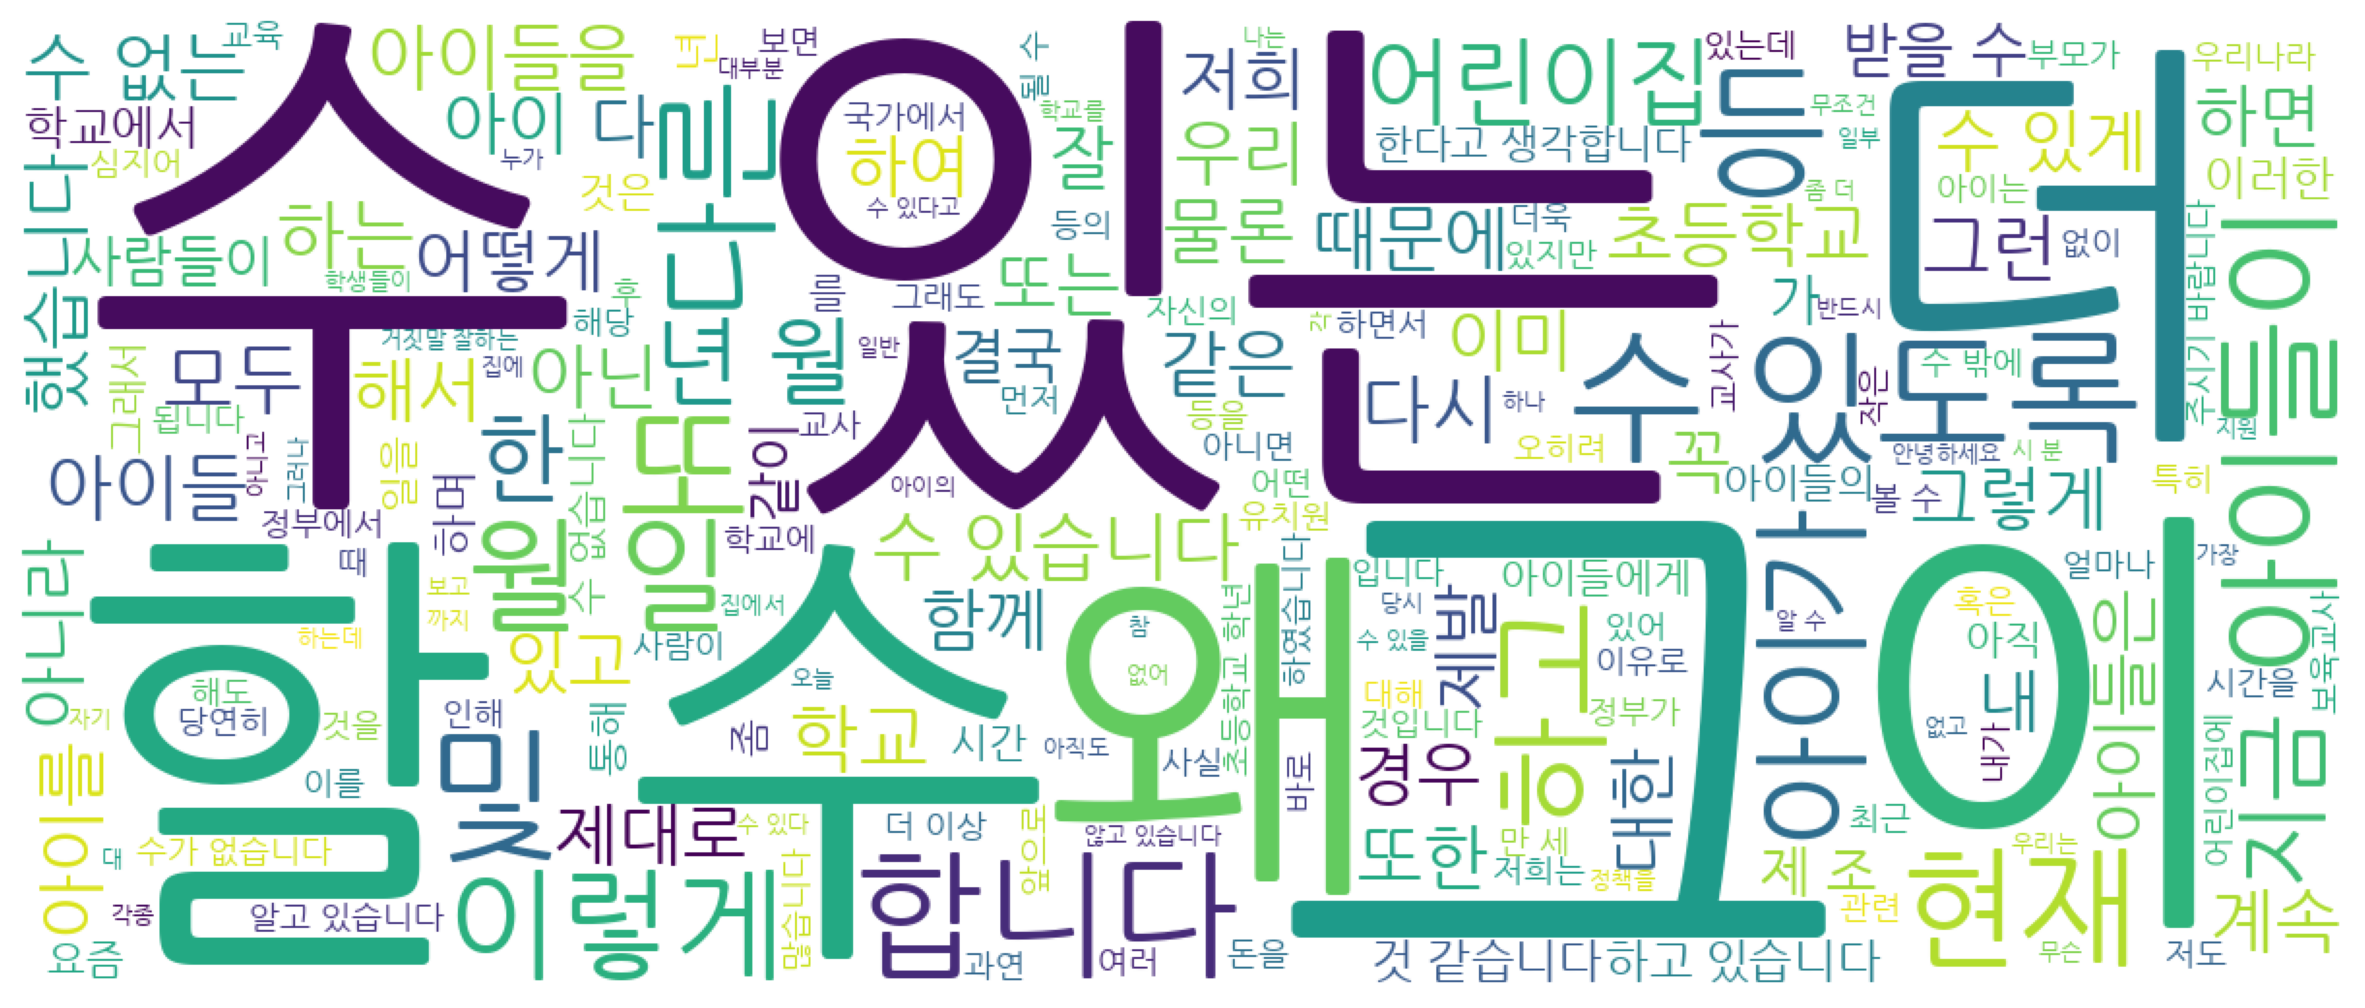

In [42]:
# display_word_cloud 함수 안에 font_path 위치 지정
font_path = r"/usr/share/fonts/nanum/NanumGothic.ttf"
#display_word_cloud?
display_word_cloud(' '.join(content_text))

In [43]:
from soynlp.noun import LRNounExtractor


In [45]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(content_text)
nouns = noun_extractor.extract()



[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (149911, 73537) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 25598 nouns are extracted
CPU times: user 1min, sys: 1.34 s, total: 1min 1s
Wall time: 1min 1s


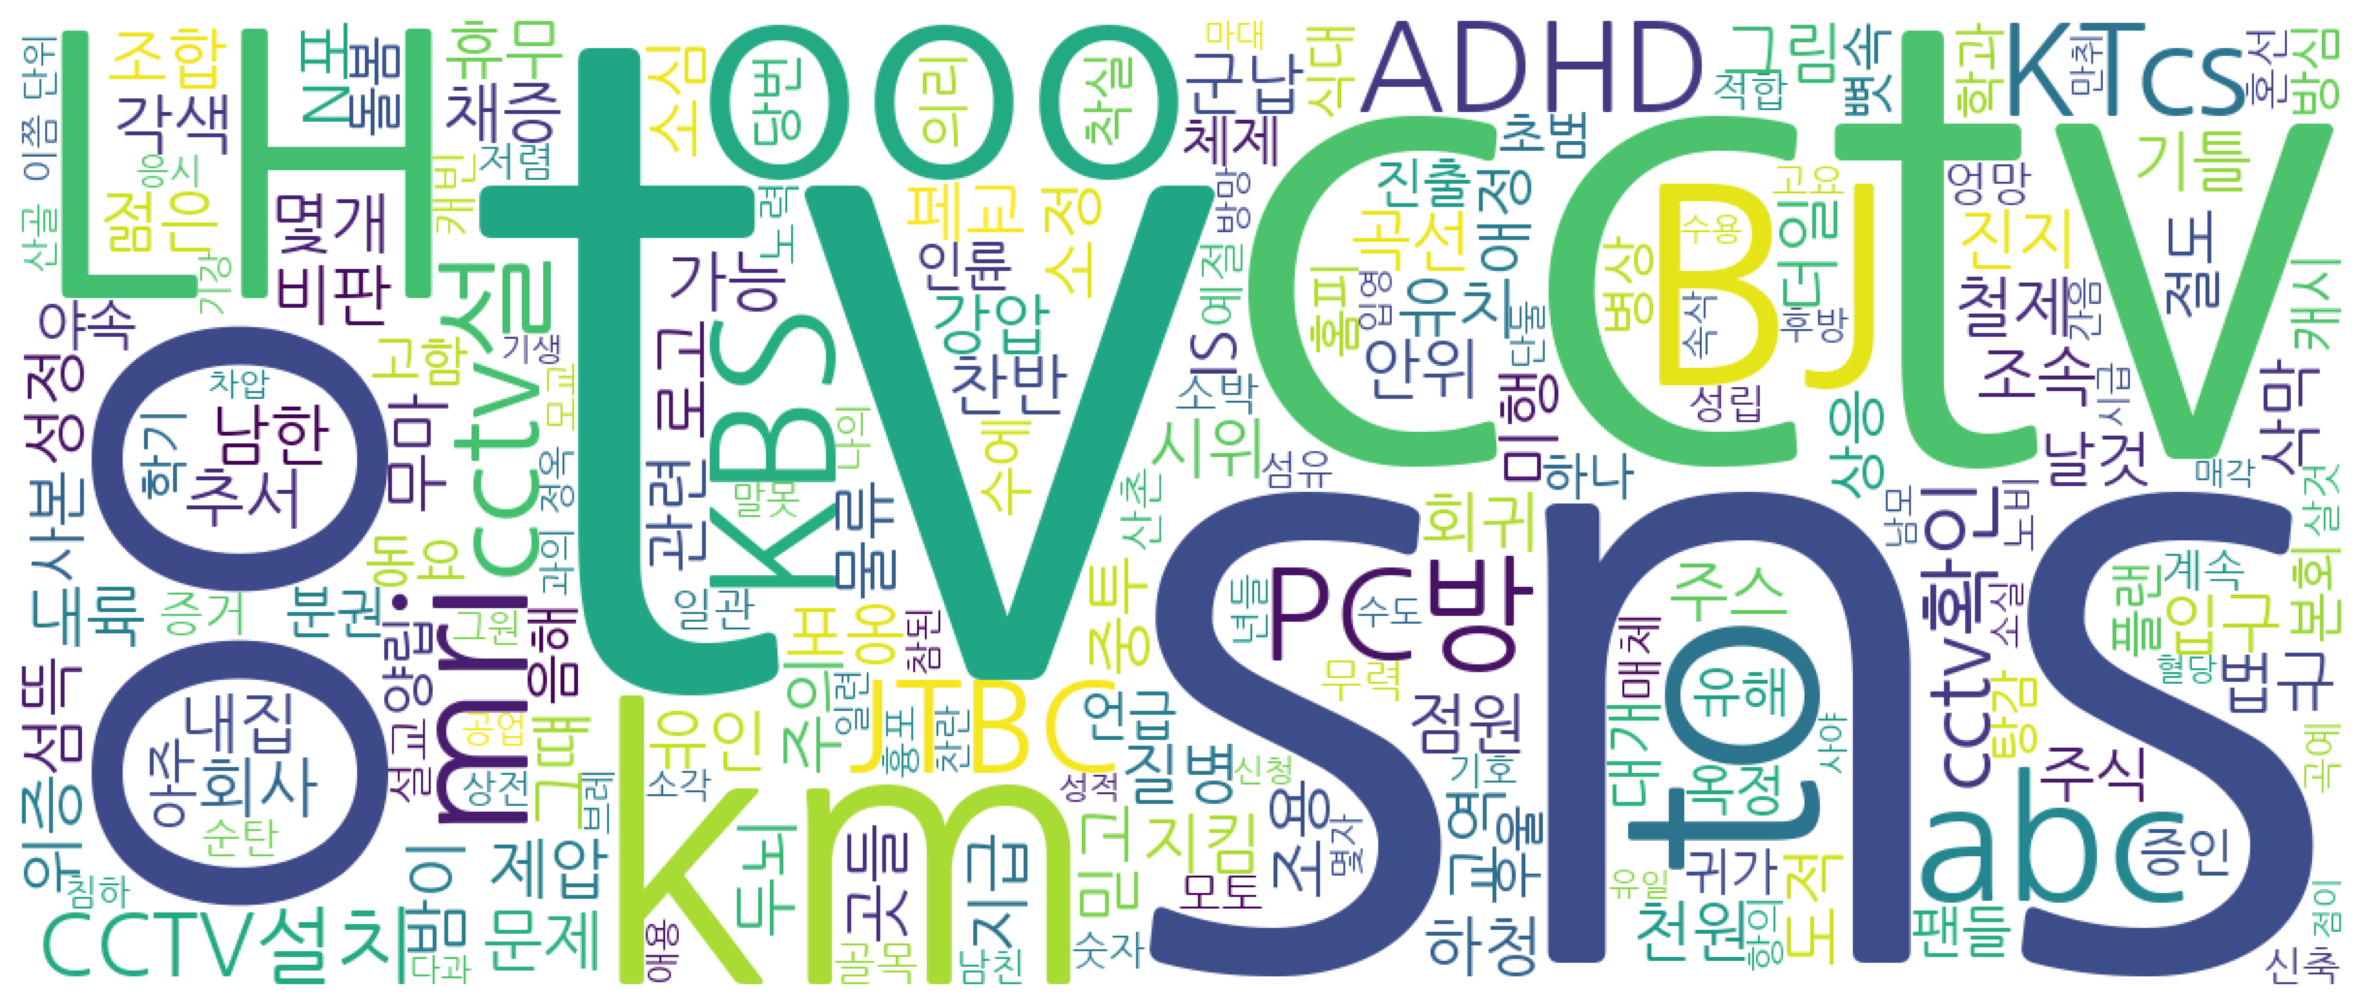

CPU times: user 2.3 s, sys: 145 ms, total: 2.45 s
Wall time: 2.28 s


In [46]:
%time display_word_cloud(' '.join(nouns))